<a href="https://colab.research.google.com/github/Mohon127/Digital_Image_Processing/blob/main/filter_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

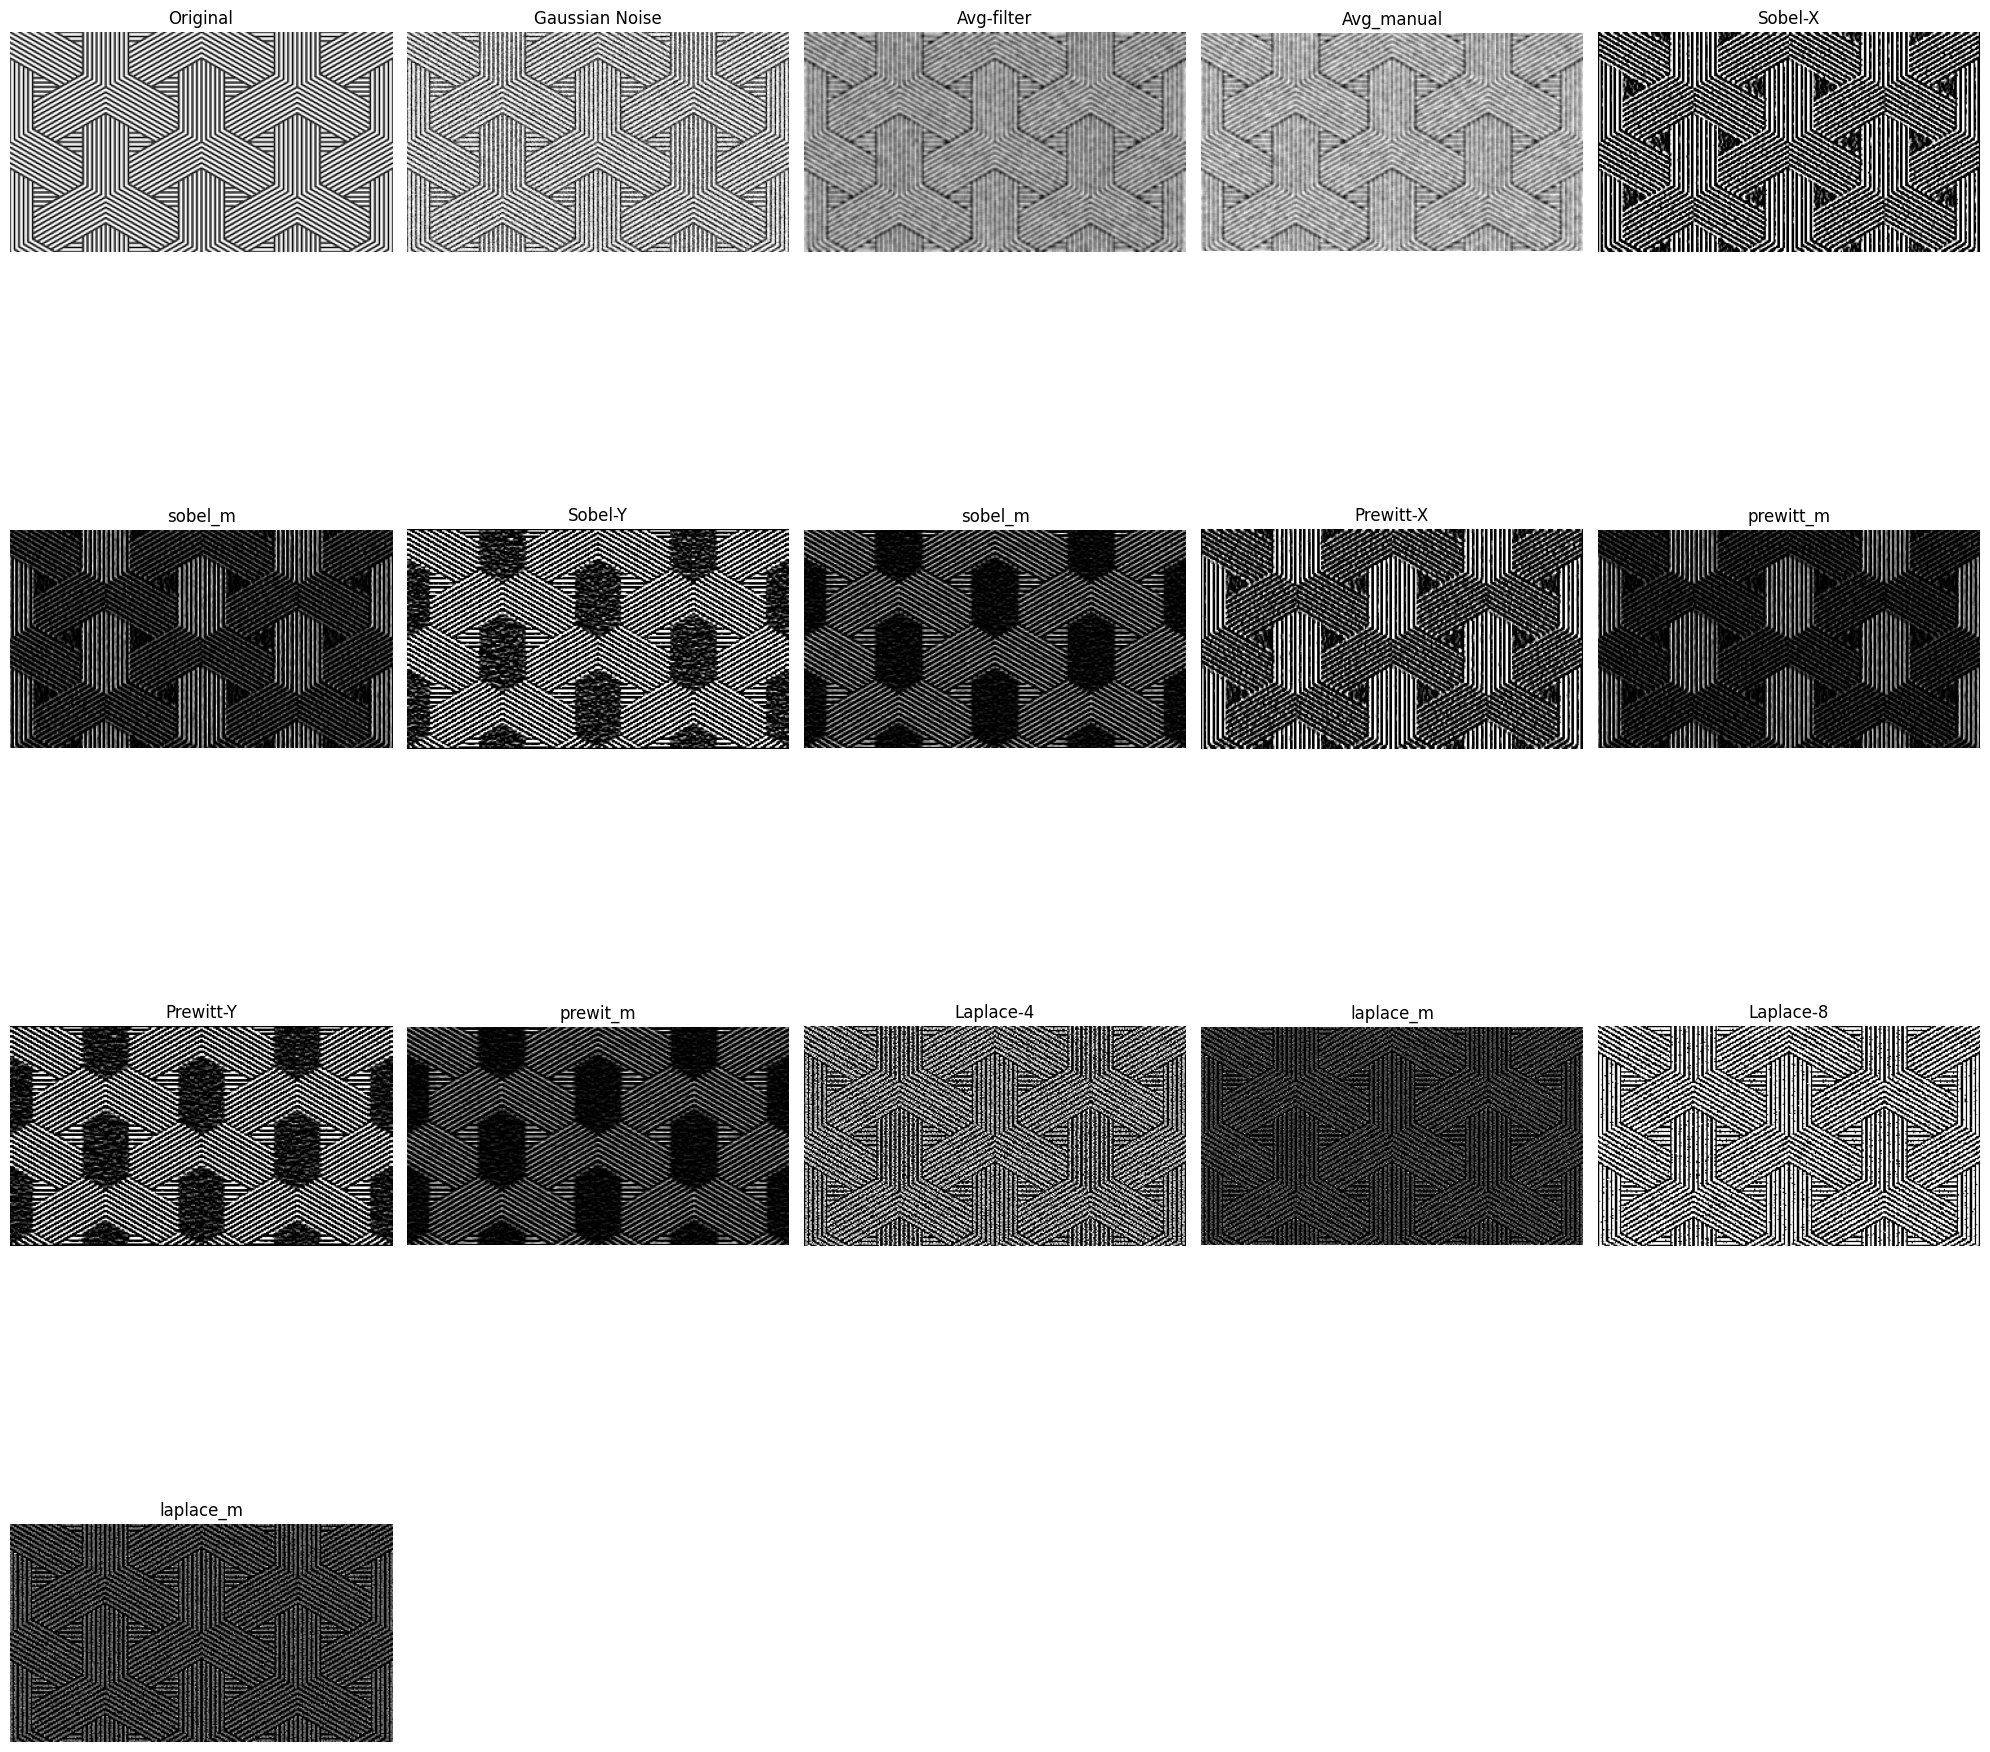

In [ ]:
"""
Problem statement:
    Apply spatial filtering by OpenCV's built-in function cv2.filter2D() using:

    > a smoothing or average kernel [e.g., a kernel with 1 only]
    > a Sobel kernel in x-direction and a Sobel kernel in y-direction
    > a Prewitt kernel in x-direction and a Prewitt kernel in y-direction
    > a Laplace kernel
"""

#==============  Import required libraries =================================
import matplotlib.pyplot as plt
import cv2
import numpy as np


def main():
    #============= Read the image in grayscale (0 flag = grayscale) =========
    img_gray = cv2.imread("/content/rgb19.png", 0)

    #============= Add Gaussian noise (manual way) ==========================
    row, col = img_gray.shape
    mean = 0
    var = 0.01
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy_img = img_gray + gauss * 255   # scale noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

    #============= Define kernels ================================

    avg_filter = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]], dtype=np.float32) / 9


    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [0,  0,  0],
                        [1,  2,  1]], dtype=np.float32)

    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]], dtype=np.float32)

    prewitt_y = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]], dtype=np.float32)

    laplace_4 = np.array([[ 0, -1,  0],
                          [-1,  4, -1],
                          [ 0, -1,  0]], dtype=np.float32)

    laplace_8 = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]], dtype=np.float32)


    #============= Apply filters using cv2.filter2D =========================
    avg = cv2.filter2D(noisy_img, -1, avg_filter)
    avg_m = filter(noisy_img, avg_filter)

    sobel_x_f = cv2.filter2D(noisy_img, -1, sobel_x)
    sobel_y_f = cv2.filter2D(noisy_img, -1, sobel_y)
    sobel_x_m = filter(noisy_img, sobel_x)
    sobel_y_m = filter(noisy_img, sobel_y)

    prewitt_x_f = cv2.filter2D(noisy_img, -1, prewitt_x)
    prewitt_y_f = cv2.filter2D(noisy_img, -1, prewitt_y)
    prewitt_x_m = filter(noisy_img, prewitt_x)
    prewitt_y_m = filter(noisy_img, prewitt_y)


    laplace_4_f = cv2.filter2D(noisy_img, -1, laplace_4)
    laplace_8_f = cv2.filter2D(noisy_img, -1, laplace_8)
    laplace_4_m = filter(noisy_img, laplace_4)
    laplace_8_m = filter(noisy_img, laplace_8)


    #============= Collect images for display ===============================
    img_set = [img_gray, noisy_img, avg, avg_m, sobel_x_f, sobel_x_m, sobel_y_f, sobel_y_m, prewitt_x_f, prewitt_x_m, prewitt_y_f, prewitt_y_m, laplace_4_f, laplace_4_m, laplace_8_f, laplace_8_m]
    img_title = ['Original', 'Gaussian Noise', 'Avg-filter','Avg_manual', 'Sobel-X', 'sobel_m', 'Sobel-Y', 'sobel_m', 'Prewitt-X', 'prewitt_m', 'Prewitt-Y', 'prewit_m', 'Laplace-4', 'laplace_m', 'Laplace-8', 'laplace_m']

    #============= Display ==================================================
    display(img_set, img_title)



def filter(input_img, kernel):
  tmp_img = input_img.astype(np.float32)
  input_h, input_w = input_img.shape
  kernel_h, kernel_w = kernel.shape
  output_h = input_h - kernel_h + 1
  output_w = input_w - kernel_w + 1

  output_img = np.zeros((output_h, output_w), dtype = np.float32)
  for h in range(output_h):
    for w in range(output_w):
      roi = tmp_img[h : h + kernel_h, w : w + kernel_w]
      output_img[h, w] = int(np.sum(roi * kernel))

  output_img = np.clip(output_img, 0, 255).astype(np.uint8)

  return output_img


#====================  function to display all image ========================
def display(img_set, img_title):

    plt.figure(figsize=(20,25))

    for i in range(len(img_set)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(img_set[i], cmap='gray')
        plt.title(img_title[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
